# Clone Essay-BR *corpus*


* https://github.com/rafaelanchieta/essay




In [1]:
import os
import pandas as pd
from tqdm import tqdm
from datetime import date
import numpy as np
import seaborn as sns

tqdm.pandas()

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
DIRETORIO_COHEBERT = "data"

DIRETORIO_LOCAL = "/content/" + DIRETORIO_COHEBERT + "/"

# Diretório no google drive com os arquivos pré-processados
DIRETORIO_DRIVE = "/content/drive/MyDrive/Colab Notebooks/BERT_large_experimentos/" + DIRETORIO_COHEBERT

NOME_ARQUIVO_INPUT = 'bert_large_redacoes_tema_texto_motivador_categoria.csv'

In [ ]:
import time
import datetime

# Marca o tempo de início do processamento
inicio_processamento = time.time()

In [ ]:
# Import das bibliotecas.
import logging # Biblioteca de logging

# Formatando a mensagem de logging
logging.basicConfig(format="%(asctime)s : %(levelname)s : %(message)s")

logger = logging.getLogger()
logger.setLevel(logging.INFO)

In [ ]:
! pip install sklearn
! pip install -U sentence-transformers
! python -m spacy download pt_core_news_sm

import nltk
nltk.download('punkt')

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 58.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 78.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 34.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 119.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 88.1 MB/s eta 0:

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df=pd.read_csv(f"{DIRETORIO_DRIVE}/{NOME_ARQUIVO_INPUT}")
df.sample(5)

,id,redacao,nota_competencia_2,nota_geral,tema,texto_motivador,categoria,sentencas_redacao,sentencas_texto_motivador,qtd_sentencas_redacao,...,len_texto_motivador,qtd_bert_tokens_redacao,qtd_bert_texto_motivador,tokens_sentencas_redacao,tokens_sentencas_texto_motivador,tokens_sentencas_tema,avg_len_sentencas_redacao,avg_len_sentencas_texto_motivador,avg_bert_tokens_sentencas_texto_motivador,avg_bert_tokens_sentencas_redacao
4897,5010,É notório o momento que todos estamos passando...,160,720,Conscientização da população para o isolamento...,Um estudo da Universidade Estadual de Campina...,sociedade e cultura,['É notório o momento que todos estamos passan...,"[' ', 'Um estudo da Universidade Estadual de C...",6,...,2218,359,507,"[['[CLS]', 'e', 'notor', '##io', 'o', 'momento...","[['[CLS]', '[SEP]'], ['[CLS]', 'um', 'estudo',...","['[CLS]', 'consci', '##ent', '##iza', '##ca', ...",267.000000,170.615385,40.846154,61.500000
5737,5851,Que o uso de bicicletas como substituta de mei...,120,520,Bicicletas e ciclofaixas esto chegando para fi...,O uso da bicicleta como alternativa para o tra...,sociedade e cultura,['Que o uso de bicicletas como substituta de m...,['O uso da bicicleta como alternativa para o t...,10,...,1124,446,266,"[['[CLS]', 'que', 'o', 'uso', 'de', 'bicicleta...","[['[CLS]', 'o', 'uso', 'da', 'bicicleta', 'com...","['[CLS]', 'bicicleta', '##s', 'e', 'ciclo', '#...",240.900000,112.400000,28.400000,46.400000
943,945,"Segundo Paulo Freire, o acesso educação não mu...",120,480,Democratização do acesso ao cinema no Brasil,TEXTO I \nNo dia da primeira exibição pública ...,sociedade e cultura,"['Segundo Paulo Freire, o acesso educação não ...","['TEXTO', 'I \n', 'No dia da primeira exibição...",9,...,2356,413,628,"[['[CLS]', 'segundo', 'paul', '##o', 'fre', '#...","[['[CLS]', 'texto', '[SEP]'], ['[CLS]', 'i', '...","['[CLS]', 'democra', '##tiza', '##ca', '##o', ...",196.222222,69.294118,20.411765,47.666667
6267,6386,"Coragem é resistência ao medo, domínio do medo...",160,680,Os efeitos da covardia e da coragem sobre a so...,"A covardia do capito Francesco Schettino, do C...",sociedade e cultura,"['Coragem é resistência ao medo, domínio do me...","['A covardia do capito Francesco Schettino, do...",11,...,1098,400,287,"[['[CLS]', 'coragem', 'e', 'res', '##iste', '#...","[['[CLS]', 'a', 'co', '##vard', '##ia', 'do', ...","['[CLS]', 'os', 'efeitos', 'da', 'co', '##vard...",190.272727,109.800000,30.500000,38.181818
4757,4870,"Esse assunto é um tanto quanto delicado, pois ...",120,640,A cultura da erotização infantil,"Antes de tudo, é preciso entender que a sexual...",sociedade e cultura,"['Esse assunto é um tanto quanto delicado, poi...","['Antes de tudo, é preciso entender que a sexu...",5,...,2639,315,616,"[['[CLS]', 'esse', 'assunto', 'e', 'um', 'tant...","[['[CLS]', 'antes', 'de', 'tudo', ',', 'e', 'p...","['[CLS]', 'a', 'cultura', 'da', 'er', '##ot', ...",271.000000,164.937500,40.375000,64.600000


# Remove redações e textos motivadores com mais de 500 tokens

In [ ]:
df=df[(df.qtd_bert_texto_motivador <= 500) & (df.qtd_bert_tokens_redacao <= 500)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2106 entries, 38 to 6453
Data columns (total 24 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   id                                         2106 non-null   int64  
 1   redacao                                    2106 non-null   object 
 2   nota_competencia_2                         2106 non-null   int64  
 3   nota_geral                                 2106 non-null   int64  
 4   tema                                       2106 non-null   object 
 5   texto_motivador                            2106 non-null   object 
 6   categoria                                  2106 non-null   object 
 7   sentencas_redacao                          2106 non-null   object 
 8   sentencas_texto_motivador                  2106 non-null   object 
 9   qtd_sentencas_redacao                      2106 non-null   int64  
 10  qtd_sentencas_texto_mot

# Funcões Auxiliares e Classes


*   get_stop_words
*   sanitize_document
*   get_sentences
*   List item






In [ ]:
df.sample(5)

,id,redacao,nota_competencia_2,nota_geral,tema,texto_motivador,categoria,sentencas_redacao,sentencas_texto_motivador,qtd_sentencas_redacao,...,len_texto_motivador,qtd_bert_tokens_redacao,qtd_bert_texto_motivador,tokens_sentencas_redacao,tokens_sentencas_texto_motivador,tokens_sentencas_tema,avg_len_sentencas_redacao,avg_len_sentencas_texto_motivador,avg_bert_tokens_sentencas_texto_motivador,avg_bert_tokens_sentencas_redacao
6354,6476,Ao decorrer do tempo as mulheres consi...,120,560,Qual o papel da mulher na sociedade brasileira...,Dilma Rousseff elegeu-se Presidente da Repblic...,sociedade e cultura,['Ao decorrer do tempo as mulheres con...,['Dilma Rousseff elegeu-se Presidente da Repbl...,6,...,862,222,196,"[['[CLS]', 'ao', 'decorrer', 'do', 'tempo', 'a...","[['[CLS]', 'dil', '##ma', 'rou', '##s', '##se'...","['[CLS]', 'qual', 'o', 'papel', 'da', 'mulher'...",210.000000,107.750000,26.250000,38.666667
5438,5551,"Em sua canção Pela Internet, o cantor Gilberto...",120,720,Impactos do uso das redes sociais na saúde mental,"Um impacto enorme, uma influência de grande pr...",saúde,"['Em sua canção Pela Internet, o cantor Gilber...","['Um impacto enorme, uma influência de grande ...",11,...,1690,441,420,"[['[CLS]', 'em', 'sua', 'canc', '##ao', 'pela'...","[['[CLS]', 'um', 'impacto', 'enorme', ',', 'um...","['[CLS]', 'impactos', 'do', 'uso', 'das', 'red...",163.363636,153.636364,40.000000,41.909091
4004,4056,Mediante ao tal acontecimento da pandemia do n...,160,800,Desafios na Educação a Distância no Brasil,Educação a distância é a modalidade educaciona...,educação,['Mediante ao tal acontecimento da pandemia do...,['Educação a distância é a modalidade educacio...,11,...,1837,419,443,"[['[CLS]', 'mediante', 'ao', 'tal', 'acontecim...","[['[CLS]', 'educa', '##ca', '##o', 'a', 'dista...","['[CLS]', 'desafios', 'na', 'educa', '##ca', '...",171.909091,183.700000,46.100000,39.909091
1662,1664,A intolerância e o discurso de ódio nas redes ...,120,560,O discurso de ódio nas redes sociais,É chamado discurso de ódio determinada mensage...,sociedade e cultura,['A intolerância e o discurso de ódio nas rede...,['É chamado discurso de ódio determinada mensa...,8,...,1869,263,435,"[['[CLS]', 'a', 'into', '##ler', '##anc', '##i...","[['[CLS]', 'e', 'chamado', 'discurso', 'de', '...","['[CLS]', 'o', 'discurso', 'de', 'o', '##dio',...",148.875000,124.600000,30.866667,34.625000
2144,2147,A homossexualidade vem sendo bastante discutid...,120,600,Homofobia: um debate contemporâneo importante,A palavra homofobia significa a repulsa ou o p...,sociedade e cultura,['A homossexualidade vem sendo bastante discut...,['A palavra homofobia significa a repulsa ou o...,8,...,1973,410,455,"[['[CLS]', 'a', 'homossexual', '##idade', 'vem...","[['[CLS]', 'a', 'palavra', 'homo', '##fo', '##...","['[CLS]', 'homo', '##fo', '##bia', ':', 'um', ...",235.750000,123.312500,30.312500,53.000000


In [ ]:
# Import das bibliotecas.
import torch # Biblioteca para manipular os tensores
from torch import tensor
torch.set_printoptions(profile="full")

def getDeviceGPU():
    """
    Retorna um dispositivo de GPU se disponível ou CPU.

    Retorno:
    `device` - Um device de GPU ou CPU.
    """

    # Se existe GPU disponível.
    if torch.cuda.is_available():

        # Diz ao PyTorch para usar GPU.
        device = torch.device("cuda")

        logging.info("Existem {} GPU(s) disponíveis.".format(torch.cuda.device_count()))
        logging.info("Iremos usar a GPU: {}.".format(torch.cuda.get_device_name(0)))

    # Se não.
    else:
        logging.info("Sem GPU disponível, usando CPU.")
        device = torch.device("cpu")


In [ ]:
!nvidia-smi

Wed Nov  1 01:37:14 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import tensorflow as tf

# Recupera o nome do dispositido da GPU.
device_name = tf.test.gpu_device_name()

# O nome do dispositivo deve ser parecido com o seguinte:
if device_name == "/device:GPU:0":
    logging.info("Encontrei GPU em: {}".format(device_name))
else:
    logging.info("Dispositivo GPU não encontrado")
    #raise SystemError("Dispositivo GPU não encontrado")

INFO:root:Encontrei GPU em: /device:GPU:0


In [ ]:
# Import das bibliotecas.
import sys # Biblioteca para acessar módulos do sistema

# Se estiver executando no Google Colaboratory
# Retorna true ou false se estiver no Google Colaboratory
IN_COLAB = "google.colab" in sys.modules

In [ ]:
def conectaGPU(model, device):
    """
      Conecta um modelo BERT a GPU.

      Parâmetros:
        `model` - Um modelo BERT carregado.
        `device` - Um device de GPU.

      Retorno:
        `model` - Um objeto model BERT conectado a GPU.
    """
    # Associa a GPU ao modelo.
    model.to(device)

    # Se existe GPU disponível.
    if torch.cuda.is_available():
        # Diga ao pytorch para rodar este modelo na GPU.
        logging.info("Pytorch rodando o modelo na GPU.")
        model.cuda()

    else:
        logging.info("Pytorch rodando sem GPU.")

    return model

In [ ]:
import spacy
from sklearn.metrics.pairwise import cosine_similarity

gpu = spacy.prefer_gpu()
print('GPU:', gpu)

nlp = spacy.load("pt_core_news_sm")

GPU: True


In [ ]:
from transformers import AutoTokenizer, AutoModel

model_name = "neuralmind/bert-large-portuguese-cased"

from sentence_transformers import SentenceTransformer
sentence_model = SentenceTransformer(model_name, device="cuda")

# Load the pre-trained BERT model and tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name).to(device)


In [ ]:
################################################################################################################################################
# O método abaixo é uma tentativa de implementar o pooling de frases usando BERT, porém isso é inviável computacionalmente.
# a partir de uma estimativa aproximada, levaria cerca de 165 horas para calcular semelhanças para 2.600 ensaios e seus textos auxiliares.
################################################################################################################################################
# def get_cos_sim_redacao_texto_motivador_sentenciados(redacao_sents, texto_motivador_sents):

#   redacao_sentences_embeddings = [get_embeddings(sent) for sent in redacao_sents]
#   texto_motivador_sentences_embeddings = [get_embeddings(sent) for sent in texto_motivador_sents]

#   redacao_mean_pooled_embeedings = np.mean(redacao_sentences_embeddings, axis=0)
#   texto_motivador_mean_pooled_embeddings = np.mean(texto_motivador_sentences_embeddings, axis=0)

#   return cosine_similarity(redacao_mean_pooled_embeedings, texto_motivador_mean_pooled_embeddings)[0][0]

def get_sbert_embeddings(texto):

  inputs = tokenizer(texto, return_tensors="pt", padding=True, truncation=True)
  outputs = model(**inputs)

  embeddings = outputs.last_hidden_state[:, 0, :].detach().numpy()

  return embeddings

def get_cos_sim_redacao_texto_motivador(texto):
  return sentence_model.encode(texto, show_progress_bar=False)


def get_cos_sim_redacao_texto_motivador_from_sentence_transformers(redacao_sents, texto_motivador_sents):
  redacao_sentences_embeddings = sentence_model.encode(redacao_sents, show_progress_bar=False)
  texto_motivador_sentences_embeddings = sentence_model.encode(texto_motivador_sents, show_progress_bar=False)
  redacao_mean_pooled_embeedings = [np.mean(redacao_sentences_embeddings, axis=0)]
  texto_motivador_mean_pooled_embeddings = [np.mean(texto_motivador_sentences_embeddings, axis=0)]

  return cosine_similarity(redacao_mean_pooled_embeedings, texto_motivador_mean_pooled_embeddings)[0][0]

def get_bert_max_pooling_pytorch_tensors(texto):

    inputs = tokenizer(texto, return_tensors="pt", padding=True, truncation=True)
    outputs = model(**inputs)

    # Applying max pooling over the sequence length (axis 1)
    max_pooled_output = torch.max(outputs.last_hidden_state, dim=1)[0]

    return max_pooled_output.detach()

def get_bert_mean_pooling_pytorch_tensors(texto):

    inputs = tokenizer(texto, return_tensors="pt", padding=True, truncation=True)
    outputs = model(**inputs)

    mean_pooled = outputs.last_hidden_state.mean(dim=1)

    return mean_pooled.detach()

def get_mean_pooled_embeddings(texto):
    inputs = tokenizer(texto, return_tensors="pt", padding=True, truncation=True, max_length=512)
    outputs = model(**inputs)

    # Mask padded values
    mask = inputs['attention_mask']
    sum_embeddings = torch.sum(outputs.last_hidden_state * mask.unsqueeze(-1), dim=1)
    mean_pooled = sum_embeddings / mask.sum(dim=1, keepdim=True)

    return mean_pooled.detach().numpy()

def get_bert_non_padded_mean_pooling_pytorch_tensors(texto):
    non_padded_embeddings = get_non_padded_bert_embeddings(texto)
    mean_pooled = non_padded_embeddings.mean(dim=0).unsqueeze(0)
    return mean_pooled.detach()

def get_bert_non_padded_max_pooling_pytorch_tensors(texto):
    embeddings = get_non_padded_bert_embeddings(texto)
    max_pooled = torch.max(embeddings, dim=0)[0].unsqueeze(0)
    return  max_pooled.detach()

def get_non_padded_bert_embeddings(texto):

    inputs = tokenizer(texto, return_tensors="pt", padding=True, truncation=True)
    outputs = model(**inputs)

    # Mask the embeddings to consider only non-padded tokens
    # The mask will have 1s where there's a token, and 0s where there's padding.
    mask = inputs["attention_mask"].unsqueeze(-1).expand(outputs.last_hidden_state.size())

    # Use the mask to extract embeddings of non-padded tokens
    non_padded_embeddings = outputs.last_hidden_state[mask.bool()].view(-1, outputs.last_hidden_state.size(-1))

    return non_padded_embeddings.detach()

def get_cosine_similarity_between_embeddings_vectors(emb1, emb2):
    return cosine_similarity(emb1, emb2)[0][0]


INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: neuralmind/bert-large-portuguese-cased


In [ ]:
device = getDeviceGPU()
model = conectaGPU(model, device)

INFO:root:Existem 1 GPU(s) disponíveis.
INFO:root:Iremos usar a GPU: Tesla T4.
INFO:root:Pytorch rodando o modelo na GPU.


# BERT Gera similaridade por cosseno entre redaçãoes e seus respectivos textos motivadores [textos na íntegra]

In [ ]:
df['cos_sim_last_hidden_layers']=df.progress_apply(lambda row: get_cosine_similarity_between_embeddings_vectors(get_non_padded_bert_embeddings(row['redacao']), get_non_padded_bert_embeddings(row['texto_motivador'])), axis=1)

100%|██████████| 2106/2106 [57:55<00:00,  1.65s/it]


# SBERT Gera similaridade por cosseno entre redaçãoes e seus respectivos textos motivadores [textos sentenciados]

In [ ]:
df['cos_sim_sentence_mean_pooled']=df.progress_apply(lambda row: get_cos_sim_redacao_texto_motivador_from_sentence_transformers(eval(row['sentencas_redacao']), eval(row['sentencas_texto_motivador'])), axis=1)

100%|██████████| 2106/2106 [09:12<00:00,  3.81it/s]


In [ ]:
df.sample(5)

,id,redacao,nota_competencia_2,nota_geral,tema,texto_motivador,categoria,sentencas_redacao,sentencas_texto_motivador,qtd_sentencas_redacao,...,qtd_bert_texto_motivador,tokens_sentencas_redacao,tokens_sentencas_texto_motivador,tokens_sentencas_tema,avg_len_sentencas_redacao,avg_len_sentencas_texto_motivador,avg_bert_tokens_sentencas_texto_motivador,avg_bert_tokens_sentencas_redacao,cos_sim_last_hidden_layers,cos_sim_sentence_mean_pooled
6270,6389,Coragem e covardia são sentimentos inerentes à...,200,880,Os efeitos da covardia e da coragem sobre a so...,"A covardia do capito Francesco Schettino, do C...",sociedade e cultura,['Coragem e covardia são sentimentos inerentes...,"['A covardia do capito Francesco Schettino, do...",16,...,287,"[['[CLS]', 'coragem', 'e', 'co', '##vard', '##...","[['[CLS]', 'a', 'co', '##vard', '##ia', 'do', ...","['[CLS]', 'os', 'efeitos', 'da', 'co', '##vard...",130.687500,109.800000,30.500000,31.062500,0.630662,0.925684
2047,2050,O combate s pseudo-informações é extremamente ...,120,600,Informação e sociedade: o combate às fake news...,as fake news são mais do que simplesmente notí...,sociedade e cultura,['O combate s pseudo-informações é extremament...,['as fake news são mais do que simplesmente no...,8,...,226,"[['[CLS]', 'o', 'combate', 's', 'pseudo', '-',...","[['[CLS]', 'as', 'fa', '##ke', 'ne', '##ws', '...","['[CLS]', 'informa', '##ca', '##o', 'e', 'soci...",233.500000,106.111111,26.888889,56.875000,0.681863,0.945545
3916,3966,O sistema penitenciário surgiu como uma altern...,160,800,Caminhos para melhorar o sistema carcerário br...,"O relator especial da ONU Juan E. Méndez, espe...",segurança,['O sistema penitenciário surgiu como uma alte...,"['O relator especial da ONU Juan E. Méndez, es...",16,...,476,"[['[CLS]', 'o', 'sistema', 'pen', '##itenci', ...","[['[CLS]', 'o', 'relato', '##r', 'especial', '...","['[CLS]', 'caminhos', 'para', 'melhorar', 'o',...",94.937500,134.642857,35.857143,24.062500,0.884771,0.976825
2532,2536,A criminalidade de jovens brasileiros entre 12...,160,680,A criminalidade entre os jovens no Brasil: com...,"Entre 1996 e 2014, o número de jovens entre 12...",segurança,['A criminalidade de jovens brasileiros entre ...,"['Entre 1996 e 2014, o número de jovens entre ...",8,...,449,"[['[CLS]', 'a', 'criminalidade', 'de', 'jovens...","[['[CLS]', 'entre', '1996', 'e', '2014', ',', ...","['[CLS]', 'a', 'criminalidade', 'entre', 'os',...",218.750000,170.000000,42.636364,51.250000,0.880081,0.964613
2393,2397,As redes sociais são as maiores fontes de info...,120,640,Informação e sociedade: o combate às fake news...,as fake news são mais do que simplesmente notí...,sociedade e cultura,['As redes sociais são as maiores fontes de in...,['as fake news são mais do que simplesmente no...,11,...,226,"[['[CLS]', 'as', 'redes', 'sociais', 'sa', '##...","[['[CLS]', 'as', 'fa', '##ke', 'ne', '##ws', '...","['[CLS]', 'informa', '##ca', '##o', 'e', 'soci...",167.090909,106.111111,26.888889,42.181818,0.695630,0.956891


# Correlação entre a similaridade do cosseno entre redações e textos motivadores inteiros (BERT Embeddings gerados apartir do [CLS] token)

In [ ]:
corr = df[['nota_competencia_2', 'cos_sim_last_hidden_layers']].corr()
corr.style.background_gradient(cmap='coolwarm')

,nota_competencia_2,cos_sim_last_hidden_layers
nota_competencia_2,1.000000,-0.103365
cos_sim_last_hidden_layers,-0.103365,1.000000


<Axes: xlabel='nota_competencia_2', ylabel='cos_sim_last_hidden_layers'>

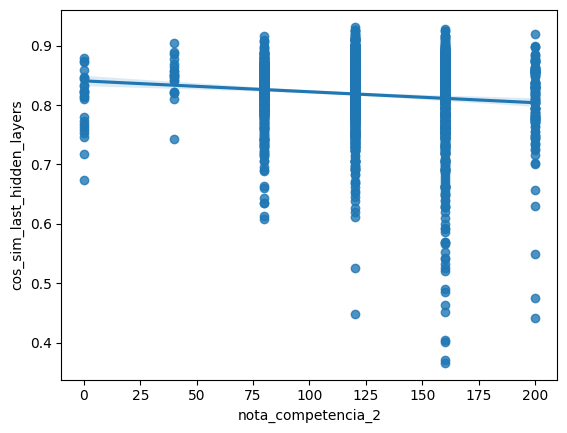

In [ ]:
sns.regplot(x=df['nota_competencia_2'], y=df['cos_sim_last_hidden_layers'])

# Correlação entre a similaridade do cosseno entre redações e textos motivadores inteiros (SBERT)

In [ ]:
corr = df[['nota_competencia_2', 'cos_sim_sentence_mean_pooled']].corr()
corr.style.background_gradient(cmap='coolwarm')

,nota_competencia_2,cos_sim_sentence_mean_pooled
nota_competencia_2,1.000000,0.082331
cos_sim_sentence_mean_pooled,0.082331,1.000000


<Axes: xlabel='nota_competencia_2', ylabel='cos_sim_sentence_mean_pooled'>

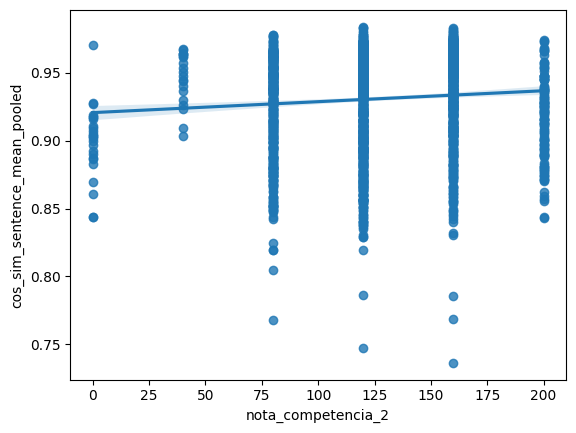

In [ ]:
sns.regplot(x=df['nota_competencia_2'], y=df['cos_sim_sentence_mean_pooled'])

# Salva dataset

In [ ]:
df.to_csv(f"{DIRETORIO_DRIVE}/bert_large_redacoes_cos_sim_texto_motivador_categoria.csv", index=False)

In [4]:
df=pd.read_csv(f"{DIRETORIO_DRIVE}/bert_large_redacoes_cos_sim_texto_motivador_categoria.csv")
df.head(5)

,id,redacao,nota_competencia_2,nota_geral,tema,texto_motivador,categoria,sentencas_redacao,sentencas_texto_motivador,qtd_sentencas_redacao,...,qtd_bert_texto_motivador,tokens_sentencas_redacao,tokens_sentencas_texto_motivador,tokens_sentencas_tema,avg_len_sentencas_redacao,avg_len_sentencas_texto_motivador,avg_bert_tokens_sentencas_texto_motivador,avg_bert_tokens_sentencas_redacao,cos_sim_last_hidden_layers,cos_sim_sentence_mean_pooled
0,38,No que se refere aos avanços tecnológicos no B...,0,0,Qualificação e o futuro do emprego,O número de pessoas desempregadas no mundo dev...,economia,['No que se refere aos avanços tecnológicos no...,['O número de pessoas desempregadas no mundo d...,5,...,465,"[['[CLS]', 'no', 'que', 'se', 'refere', 'aos',...","[['[CLS]', 'o', 'numer', '##o', 'de', 'pessoas...","['[CLS]', 'qual', '##ifica', '##ca', '##o', 'e...",173.000000,163.916667,40.583333,40.200000,0.763737,0.926874
1,55,"No Brasil colônia, assim como hoje, a corrupçã...",0,0,Reforma do Ensino Médio - uma solução ou um pr...,Um dos principais objetivos da nova proposta p...,educação,"['No Brasil colônia, assim como hoje, a corrup...",['Um dos principais objetivos da nova proposta...,8,...,452,"[['[CLS]', 'no', 'bras', '##il', 'colon', '##i...","[['[CLS]', 'um', 'dos', 'principais', 'objetiv...","['[CLS]', 'reforma', 'do', 'ensino', 'medi', '...",169.375000,98.000000,24.500000,44.000000,0.813885,0.927984
2,58,Se torna cada vez mais comum o consumo de álco...,0,0,Projeto de lei de iniciativa popular,"De acordo com Constituição Federal, o Brasil a...",política,['Se torna cada vez mais comum o consumo de ál...,"['De acordo com Constituição Federal, o Brasil...",8,...,385,"[['[CLS]', 'se', 'torna', 'cada', 'vez', 'mais...","[['[CLS]', 'de', 'acordo', 'com', 'constitui',...","['[CLS]', 'projeto', 'de', 'lei', 'de', 'inici...",149.500000,119.692308,31.461538,36.250000,0.834369,0.887332
3,60,"Frequentemente ouve-se falar de estupro, crime...",0,0,Projeto de lei de iniciativa popular,"De acordo com Constituição Federal, o Brasil a...",política,"['Frequentemente ouve-se falar de estupro, cri...","['De acordo com Constituição Federal, o Brasil...",14,...,385,"[['[CLS]', 'frequentemente', 'ouve', '-', 'se'...","[['[CLS]', 'de', 'acordo', 'com', 'constitui',...","['[CLS]', 'projeto', 'de', 'lei', 'de', 'inici...",111.785714,119.692308,31.461538,29.428571,0.745969,0.910808
4,63,"Vê-se, através dos veículos de mídia, que os a...",0,0,Projeto de lei de iniciativa popular,"De acordo com Constituição Federal, o Brasil a...",política,"['Vê-se, através dos veículos de mídia, que os...","['De acordo com Constituição Federal, o Brasil...",7,...,385,"[['[CLS]', 've', '-', 'se', ',', 'atrav', '##e...","[['[CLS]', 'de', 'acordo', 'com', 'constitui',...","['[CLS]', 'projeto', 'de', 'lei', 'de', 'inici...",145.000000,119.692308,31.461538,36.571429,0.879409,0.906736
